# <font color='Sky Blue'>**COURSE RECOMMENDATION SYSTEM**

## **Importing Libraries**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## **Loading the data**

In [30]:
data = pd.read_csv("dataset\Coursera.csv")
data

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
...,...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"�Give me liberty, or give me death:� Rememberi...",retirement Causality career history of the ...
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...


## **Exploratary Data Analysis**

In [31]:
data.isna().sum()

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

In [32]:
data.describe()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
count,3522,3522,3522,3522,3522,3522,3522
unique,3416,184,5,31,3424,3397,3424
top,Google Cloud Platform Fundamentals: Core Infra...,Coursera Project Network,Beginner,4.7,https://www.coursera.org/learn/gcp-fundamentals,This course introduces you to important concep...,Google Cloud Platform Big Data Cloud Infrast...
freq,8,562,1444,740,8,8,8


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


In [34]:
data.duplicated().sum()

98

Text(0.5, 1.0, 'Count of Courses provided by Universities')

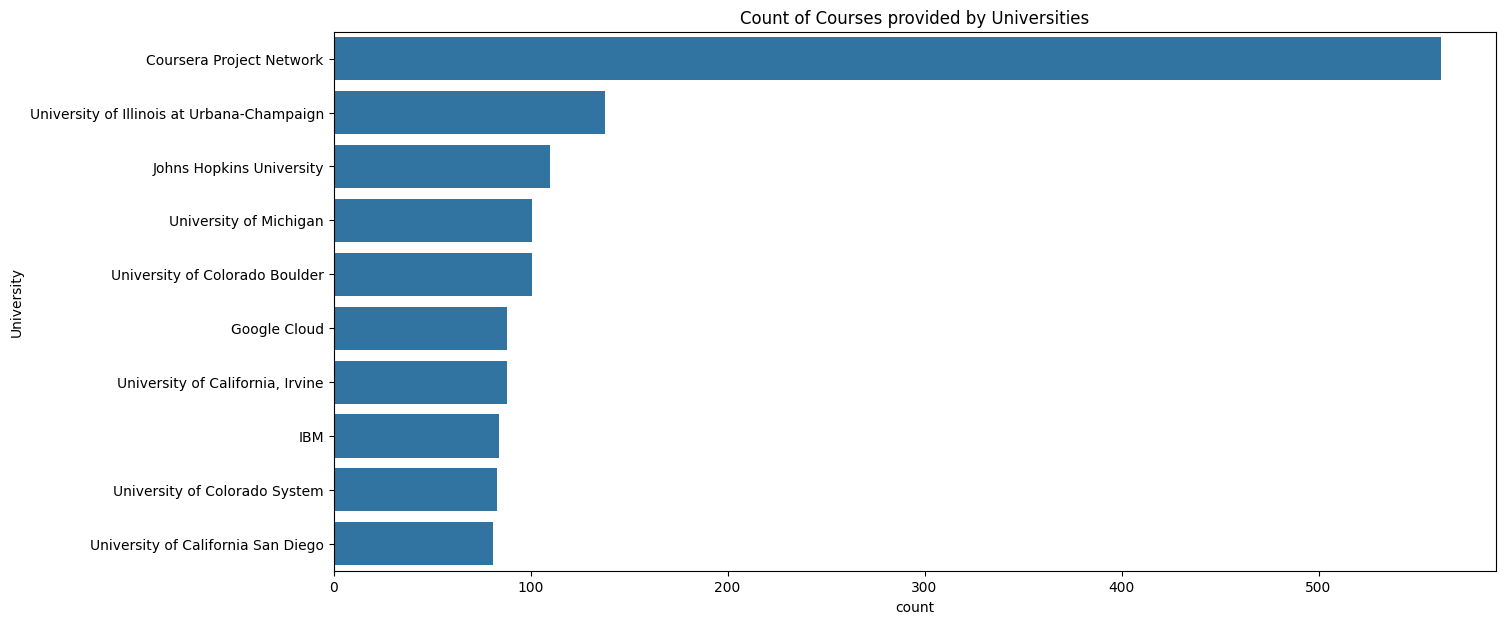

In [35]:
plt.figure(figsize=(15,7))
sns.countplot(y='University', data=data, order=pd.value_counts(data['University']).iloc[:10].index)
plt.title('Count of Courses provided by Universities')

Text(0.5, 1.0, 'Count of Courses provided by Universities')

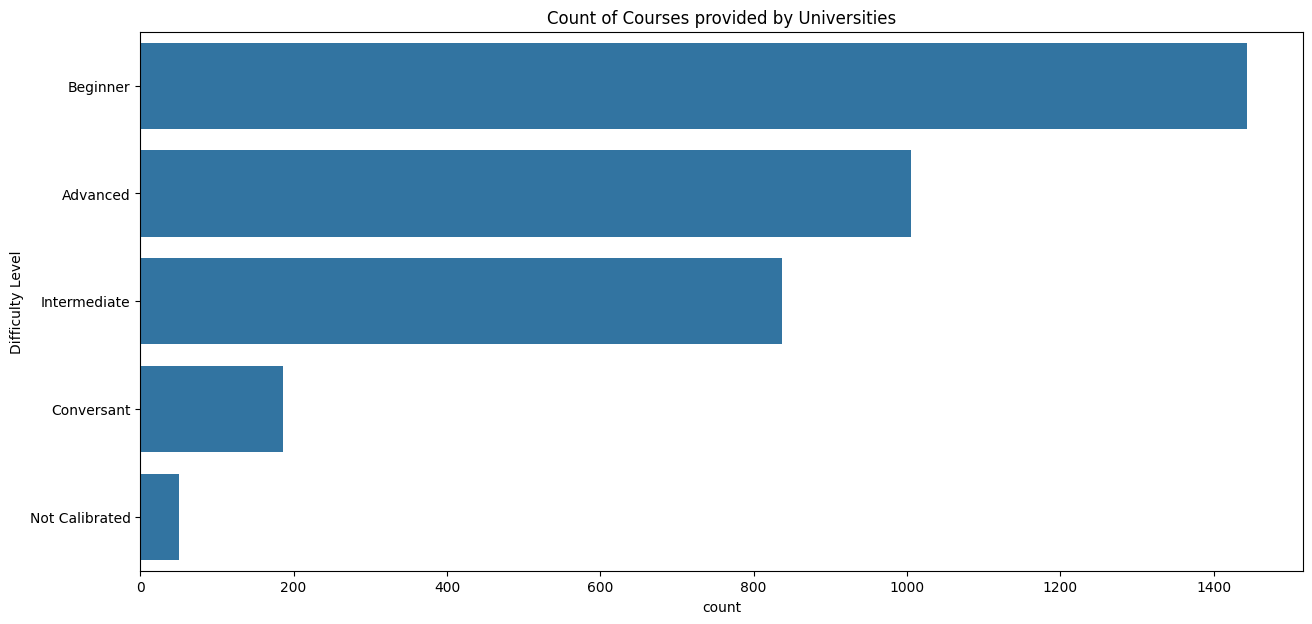

In [36]:
plt.figure(figsize=(15,7))
sns.countplot(y='Difficulty Level', data=data, order=pd.value_counts(data['Difficulty Level']).iloc[:10].index)
plt.title('Count of Courses provided by Universities')

## **Data Preprocessing**

### **Removing Duplicate values**

In [37]:
data.drop_duplicates(keep=False, inplace=True)
data.duplicated().sum()

0

In [38]:
data.drop(['Course Rating','University'], inplace=True, axis=1)

In [39]:
data.head()

,Course Name,Difficulty Level,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Beginner,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Beginner,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,Advanced,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,Intermediate,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Beginner,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [40]:
def remove_punc(text):
    text=re.sub(r'[,."�_:()]'," ",text)
    return text

data['Course Description']=data['Course Description'].apply(remove_punc)
data['Course Name']=data['Course Name'].apply(remove_punc)
data['Skills']=data['Skills'].apply(remove_punc)

In [41]:
data['Course Description']

0       Write a Full Length Feature Film Script  In th...
1       By the end of this guided project  you will be...
2       This course consists of a general presentation...
3       When it comes to numbers  there is always more...
4       In this course you ll learn how to effectively...
                              ...                        
3517    In the capstone  students will build a series ...
3518     Give me liberty  or give me death   Rememberi...
3519     Megatrends  heavily influence today s organis...
3520    This course teaches dynamics  one of the basic...
3521    In this course   Architecting with Google Kube...
Name: Course Description, Length: 3348, dtype: object

In [42]:
data['Final Col']=data['Course Name']+' '+data['Course Description']+' '+data['Skills']
data['Final Col']

0       Write A Feature Length Screenplay For Film Or ...
1       Business Strategy  Business Model Canvas Analy...
2       Silicon Thin Film Solar Cells This course cons...
3       Finance for Managers When it comes to numbers ...
4       Retrieve Data using Single-Table SQL Queries I...
                              ...                        
3517    Capstone  Retrieving  Processing  and Visualiz...
3518    Patrick Henry  Forgotten Founder  Give me libe...
3519    Business intelligence and data analytics  Gene...
3520    Rigid Body Dynamics This course teaches dynami...
3521    Architecting with Google Kubernetes Engine  Pr...
Name: Final Col, Length: 3348, dtype: object

In [43]:
data.head()

,Course Name,Difficulty Level,Course URL,Course Description,Skills,Final Col
0,Write A Feature Length Screenplay For Film Or ...,Beginner,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,Write A Feature Length Screenplay For Film Or ...
1,Business Strategy Business Model Canvas Analy...,Beginner,https://www.coursera.org/learn/canvas-analysis...,By the end of this guided project you will be...,Finance business plan persona user experien...,Business Strategy Business Model Canvas Analy...
2,Silicon Thin Film Solar Cells,Advanced,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,Silicon Thin Film Solar Cells This course cons...
3,Finance for Managers,Intermediate,https://www.coursera.org/learn/operational-fin...,When it comes to numbers there is always more...,accounts receivable dupont analysis analysis...,Finance for Managers When it comes to numbers ...
4,Retrieve Data using Single-Table SQL Queries,Beginner,https://www.coursera.org/learn/single-table-sq...,In this course you ll learn how to effectively...,Data Analysis select sql database manageme...,Retrieve Data using Single-Table SQL Queries I...


In [44]:
data[['Skills']]

,Skills
0,Drama Comedy peering screenwriting film D...
1,Finance business plan persona user experien...
2,chemistry physics Solar Energy film lambda...
3,accounts receivable dupont analysis analysis...
4,Data Analysis select sql database manageme...
...,...
3517,Databases syntax analysis web Data Visuali...
3518,retirement Causality career history of the ...
3519,analytics tableau software Business Intellig...
3520,Angular Mechanical Design fluid mechanics F...


In [45]:
tfidf = TfidfVectorizer(stop_words='english')

data['Final Col'] = data['Final Col'].fillna('')
tfidf_matrix = tfidf.fit_transform(data['Final Col'])

In [46]:
similarity = cosine_similarity(tfidf_matrix)
similarity

array([[1.00000000e+00, 2.35880076e-02, 3.37611697e-02, ...,
        2.68573845e-02, 2.91445278e-02, 1.59267895e-02],
       [2.35880076e-02, 1.00000000e+00, 1.04016736e-02, ...,
        1.07496534e-01, 2.72686331e-03, 3.34888006e-02],
       [3.37611697e-02, 1.04016736e-02, 1.00000000e+00, ...,
        7.17851665e-03, 3.40008845e-02, 6.89280055e-03],
       ...,
       [2.68573845e-02, 1.07496534e-01, 7.17851665e-03, ...,
        1.00000000e+00, 3.47084113e-04, 8.11233436e-03],
       [2.91445278e-02, 2.72686331e-03, 3.40008845e-02, ...,
        3.47084113e-04, 1.00000000e+00, 1.29147100e-03],
       [1.59267895e-02, 3.34888006e-02, 6.89280055e-03, ...,
        8.11233436e-03, 1.29147100e-03, 1.00000000e+00]])

In [47]:
indices = pd.Series(data.index, index=data['Course Name']).drop_duplicates()

In [48]:
def get_recommendations(title, cosine_sim=similarity):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    courses = [i[0] for i in sim_scores]

    return data['Course Name'].iloc[courses]

In [49]:
get_recommendations("Finance for Managers")

419                    Finance for Non-Financial Managers
1839    Fundamentals of financial and management accou...
708     Understanding Financial Statements  Company Po...
1891          Accounting and Finance for IT professionals
1985                  Introduction to Finance  The Basics
Name: Course Name, dtype: object

In [50]:
get_recommendations("Finance for Non-Financial Managers")

2961         Investment Strategies and Portfolio Analysis
1055       Capstone  Build a Winning Investment Portfolio
2605                                  Investment Strategy
2232                        Portfolio and Risk Management
2202    Introduction to Portfolio Construction and Ana...
Name: Course Name, dtype: object

In [51]:
get_recommendations("Investment Strategies and Portfolio Analysis")

1794         Introduction to Advanced Vibrations
1814        Fundamentals of waves and vibrations
462     Fundamentals of Fluid-Solid Interactions
2556     Fundamentals of Engineering Exam Review
2592                 Intro to Acoustics  Part 1 
Name: Course Name, dtype: object

In [52]:
get_recommendations("Fundamentals of waves and vibrations")

68                              Smart Contracts
3467                  Mastering Web3 with Waves
2868                          Blockchain Basics
2486                       Blockchain Platforms
2663    Introduction to Blockchain Technologies
Name: Course Name, dtype: object